#### **About the dataset**
   This synthetic but medically realistic dataset is designed to help researchers, data scientists, and healthcare professionals explore Chronic Kidney Disease (CKD) risk and predict the need for dialysis using machine learning models.
   It contains 1,985 rows and 9 carefully crafted clinical features along with 2 target columns. Each data point simulates a real patient's profile based on clinical guidelines, nephrology research, and disease progression patterns.

   **Column Explained:**

   - Age: Age of the patient
   - Creatinine_Level : Blood creatinine level (mg/dL), a key kidney function marker.
   - BUN : Blood urea nitrogen (BUN) level (mg/dL), another kidney function marker.
   - Diabetes : 1 if patient has diabetes, else 0. Diabetes is a major CKD risk factor.
   - Hypertension : 1 if patient has hypertension, else 0. Hypertension is another major CKD risk factor.
   - GFR : Estimated Glomerular Filtration Rate (mL/min/1.73 m²), a measure of kidney function.
   - Urine_Output : Daily urine output (mL), indicating kidney health.
   - CKD_Status : 1 if patient has CKD, else 0. Indicates presence of chronic kidney disease.

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [2]:
data_kidney =pd.read_csv('kidney_disease_dataset.csv')

In [ ]:
pd

**Reading data**

In [3]:
data_kidney.head()

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
0,71,0.30,40.9,0,1,46.8,1622.0,1,0
1,34,1.79,17.1,0,0,43.8,1428.0,1,0
2,80,2.67,15.0,0,1,78.2,1015.0,1,0
3,40,0.97,31.1,0,1,92.8,1276.0,1,0
4,43,2.05,22.8,1,1,62.2,1154.0,0,0


**Overview of data**

In [4]:
data_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2304 non-null   int64  
 1   Creatinine_Level  2304 non-null   float64
 2   BUN               2304 non-null   float64
 3   Diabetes          2304 non-null   int64  
 4   Hypertension      2304 non-null   int64  
 5   GFR               2304 non-null   float64
 6   Urine_Output      2304 non-null   float64
 7   CKD_Status        2304 non-null   int64  
 8   Dialysis_Needed   2304 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 162.1 KB


In [5]:
data_kidney.shape

(2304, 9)

In [6]:
data_kidney.describe()

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,54.159288,1.305638,18.813672,0.406684,0.498264,68.953863,1309.189670,0.508681,0.013455
std,20.513729,0.789594,10.508358,0.491322,0.500106,24.660191,491.951914,0.500033,0.115237
min,20.000000,0.300000,5.000000,0.000000,0.000000,5.000000,100.000000,0.000000,0.000000
25%,36.000000,0.620000,9.975000,0.000000,0.000000,51.300000,967.750000,0.000000,0.000000
50%,54.000000,1.240000,18.200000,0.000000,0.000000,69.150000,1295.500000,1.000000,0.000000
75%,72.000000,1.842500,26.000000,1.000000,1.000000,86.300000,1633.500000,1.000000,0.000000
max,90.000000,4.130000,61.900000,1.000000,1.000000,120.000000,2899.000000,1.000000,1.000000


### **Exploratory Data Analysis**

In [7]:
#making a copy of dataset for analysis
data_analysis = data_kidney.copy()

In [8]:
#checking for null values
data_analysis.isnull().sum()

Age                 0
Creatinine_Level    0
BUN                 0
Diabetes            0
Hypertension        0
GFR                 0
Urine_Output        0
CKD_Status          0
Dialysis_Needed     0
dtype: int64

In [9]:
#checking for duplicate values
data_analysis.duplicated().sum()

0

In [10]:
#mapping numerical values to categorical values
data_analysis.replace({
    'CKD_Status': {1: 'CKD', 0: 'Not CKD'},
    'Dialysis_Needed': {1: 'Yes', 0: 'No'},
    'Diabetes': {1: 'Yes', 0: 'No'},
    'Hypertension': {1: 'Yes', 0: 'No'}
}, inplace=True)


In [11]:
data_analysis.head()

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
0,71,0.30,40.9,No,Yes,46.8,1622.0,CKD,No
1,34,1.79,17.1,No,No,43.8,1428.0,CKD,No
2,80,2.67,15.0,No,Yes,78.2,1015.0,CKD,No
3,40,0.97,31.1,No,Yes,92.8,1276.0,CKD,No
4,43,2.05,22.8,Yes,Yes,62.2,1154.0,Not CKD,No


In [12]:
# statistical analysis by CKD status
ckd_stats = data_analysis.groupby('CKD_Status').describe().transpose()
ckd_stats

CKD_Status                      CKD      Not CKD
Age              count  1172.000000  1132.000000
                 mean     54.409556    53.900177
                 std      20.220590    20.818650
                 min      20.000000    20.000000
                 25%      37.000000    36.000000
                 50%      54.000000    54.000000
                 75%      72.000000    72.000000
                 max      90.000000    90.000000
Creatinine_Level count  1172.000000  1132.000000
                 mean      1.449181     1.157023
                 std       0.887268     0.641072
                 min       0.300000     0.300000
                 25%       0.680000     0.590000
                 50%       1.360000     1.110000
                 75%       2.092500     1.660000
                 max       4.130000     2.500000
BUN              count  1172.000000  1132.000000
                 mean     21.971160    15.544611
                 std      11.810100     7.708145
                 min       5.000000     5.000000
                 25%      12.250000     8.400000
                 50%      21.100000    15.400000
                 75%      31.325000    21.900000
                 max      61.900000    30.000000
GFR              count  1172.000000  1132.000000
                 mean     54.375085    84.047792
                 std      22.532702    16.258606
                 min       5.000000    60.000000
                 25%      40.600000    71.200000
                 50%      51.650000    81.400000
                 75%      64.650000    95.425000
                 max     120.000000   120.000000
Urine_Output     count  1172.000000  1132.000000
                 mean   1289.081058  1330.008834
                 std     486.545923   496.844713
                 min     100.000000   100.000000
                 25%     944.750000   984.750000
                 50%    1281.000000  1310.500000
                 75%    1616.250000  1653.000000
                 max    2892.000000  2899.000000

In [ ]:
custom_palette = ["#1B2558", "#856506", "#0b398a", "#f8b71f", "#0D048F", "#bb931d", "#0B053A",
                  "#cf9202"]

blue_palette = ["#358ff7", "#125ee0", "#0E0681", "#0B053A"]
orange_palette = ["#856506", "#bb931d", "#e0a009", "#e6b951"]

import random

random.shuffle(custom_palette)

C:\Users\pales\AppData\Local\Temp\ipykernel_23096\2137701107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_analysis, x='CKD_Status', palette=custom_palette)
C:\Users\pales\AppData\Local\Temp\ipykernel_23096\2137701107.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data_analysis, x='CKD_Status', palette=custom_palette)


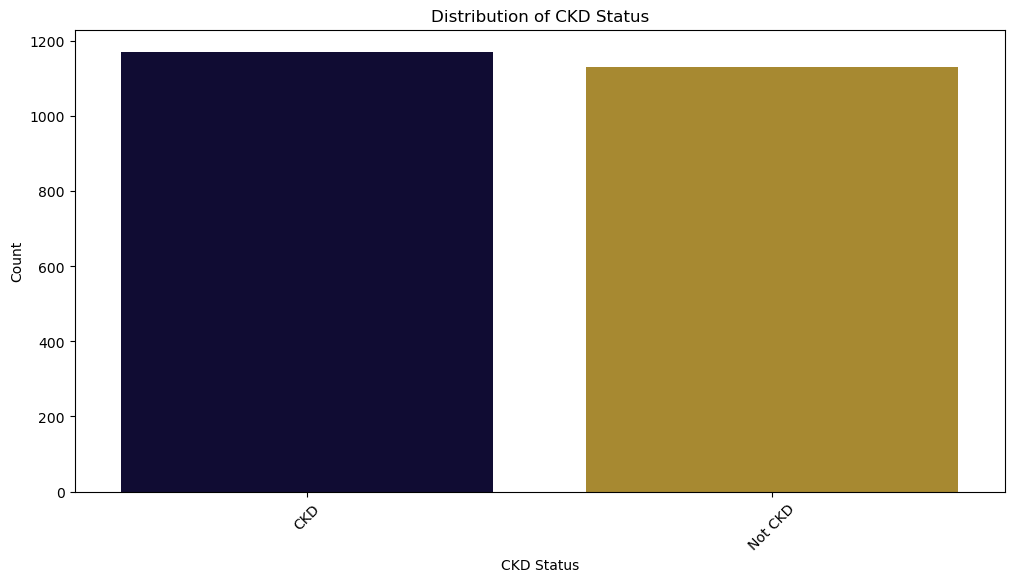

In [84]:
#data distribution by CKD status
plt.figure(figsize=(12, 6))
sns.countplot(data=data_analysis, x='CKD_Status', palette=custom_palette)
plt.title('Distribution of CKD Status')
plt.xlabel('CKD Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\pales\AppData\Local\Temp\ipykernel_23096\407654313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_analysis, x='Dialysis_Needed',palette=custom_palette)
C:\Users\pales\AppData\Local\Temp\ipykernel_23096\407654313.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data_analysis, x='Dialysis_Needed',palette=custom_palette)


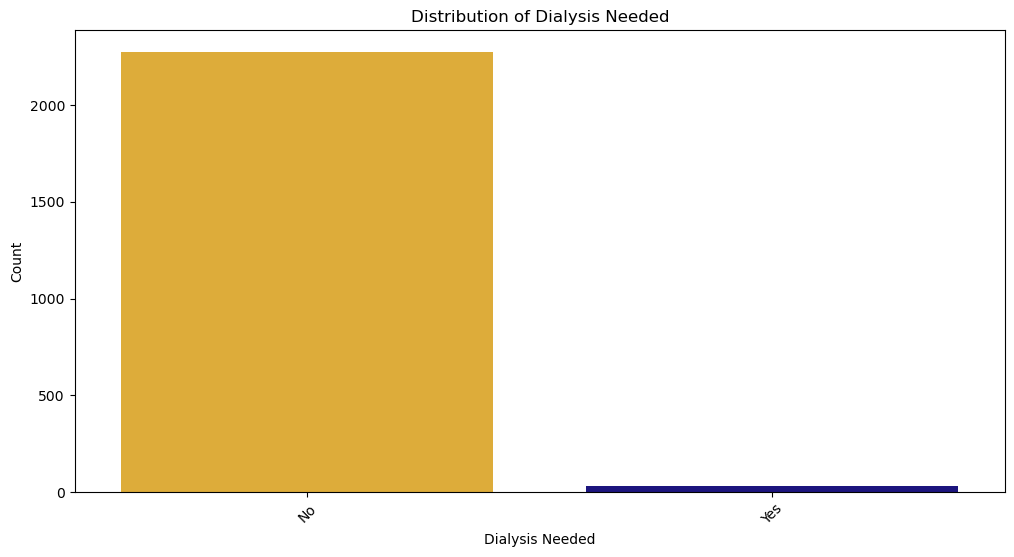

In [91]:
random.shuffle(custom_palette)
plt.figure(figsize=(12, 6))
sns.countplot(data=data_analysis, x='Dialysis_Needed',palette=custom_palette)
plt.title('Distribution of Dialysis Needed')
plt.xlabel('Dialysis Needed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

what relationships do we want to check in the data?
- dialysis and ckd 
- how does age affect ckd
- are people with diabetes more likey to have ckd
- what is the average urine output of people with ckd and do they need dialysis
- relationship between dialysis abd hypertension/diabetes
- Is there some correlation between the markers
- what is the distribution of diabetes by hypertension,are they correlated

**General Data Visualization**

C:\Users\pales\AppData\Local\Temp\ipykernel_23096\3015083190.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data = data_analysis,x="Dialysis_Needed",hue = "CKD_Status",palette=custom_palette)


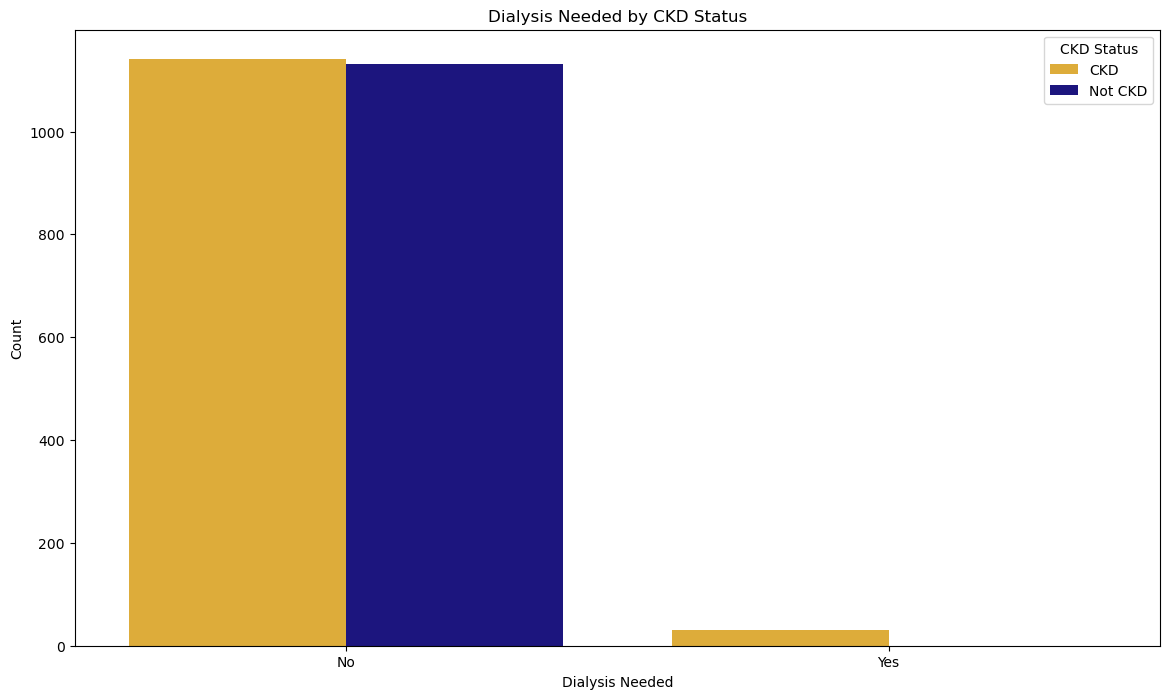

In [96]:
random.shuffle(custom_palette)
plt.figure(figsize=(14,8))
sns.countplot(data = data_analysis,x="Dialysis_Needed",hue = "CKD_Status",palette=custom_palette)
plt.title("Dialysis Needed by CKD Status")
plt.xlabel("Dialysis Needed")
plt.ylabel("Count")
plt.legend(title="CKD Status")
plt.show()

In [17]:
bins =[0,18,35,50,65,100]
labels =['0-18','19-35','36-50','51-65','66+']

data_analysis['Age_Group'] = pd.cut(data_analysis['Age'], bins=bins, labels=labels, right=False)

C:\Users\pales\AppData\Local\Temp\ipykernel_23096\743323629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_analysis, x='Age_Group', palette=blue_palette)
C:\Users\pales\AppData\Local\Temp\ipykernel_23096\743323629.py:2: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data_analysis, x='Age_Group', palette=blue_palette)


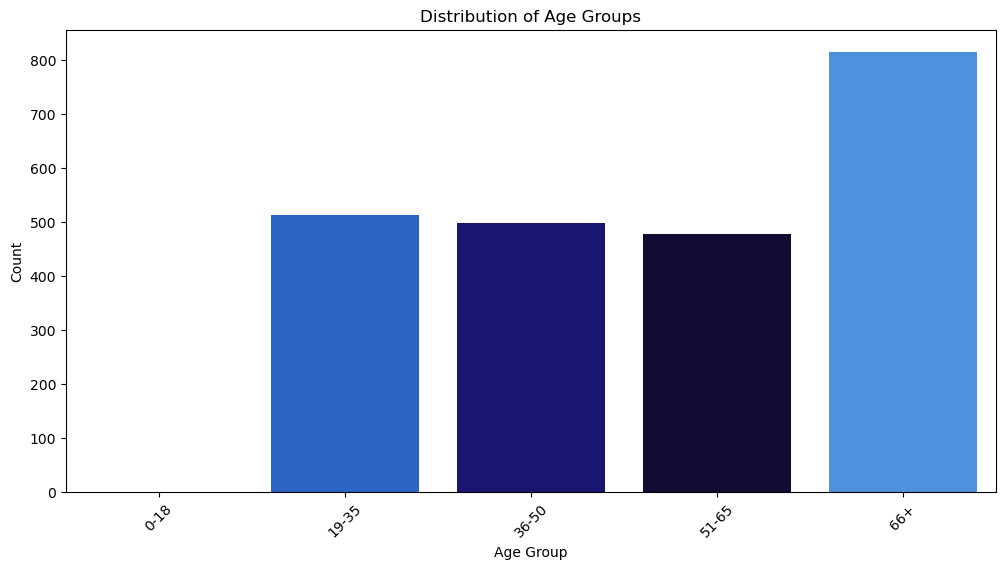

In [97]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_analysis, x='Age_Group', palette=blue_palette)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\pales\AppData\Local\Temp\ipykernel_23096\1247617000.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data_analysis, x='Age_Group',hue='Dialysis_Needed', palette=custom_palette)


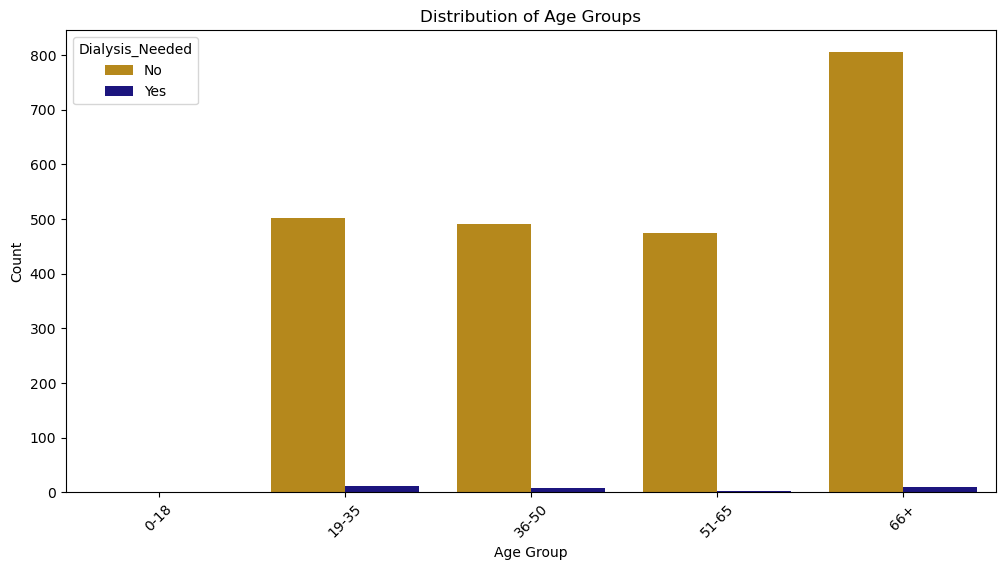

In [109]:
random.shuffle(custom_palette)
plt.figure(figsize=(12, 6))
sns.countplot(data=data_analysis, x='Age_Group',hue='Dialysis_Needed', palette=custom_palette)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\pales\AppData\Local\Temp\ipykernel_23096\3302676861.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data_analysis, x='Age_Group',hue='CKD_Status', palette=custom_palette)


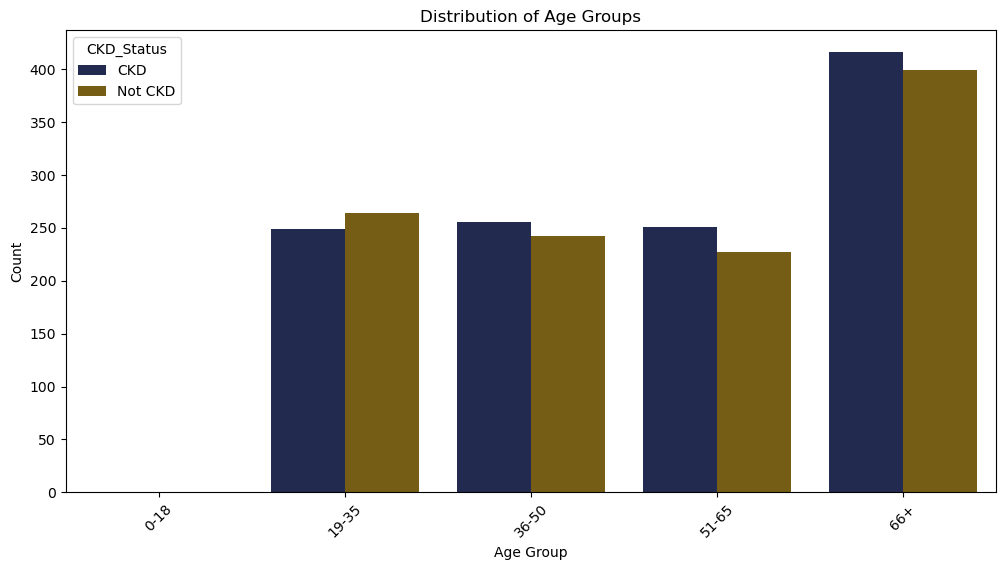

In [111]:
random.shuffle(custom_palette)
plt.figure(figsize=(12, 6))
sns.countplot(data=data_analysis, x='Age_Group',hue='CKD_Status', palette=custom_palette)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Effect of markers on chronic kidney disease**

In [48]:
data_analysis.head()

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed,Age_Group
0,71,0.30,40.9,No,Yes,46.8,1622.0,CKD,No,66+
1,34,1.79,17.1,No,No,43.8,1428.0,CKD,No,19-35
2,80,2.67,15.0,No,Yes,78.2,1015.0,CKD,No,66+
3,40,0.97,31.1,No,Yes,92.8,1276.0,CKD,No,36-50
4,43,2.05,22.8,Yes,Yes,62.2,1154.0,Not CKD,No,36-50


C:\Users\pales\AppData\Local\Temp\ipykernel_23096\2420783248.py:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data_analysis, x='Diabetes', hue='CKD_Status', palette=custom_palette)


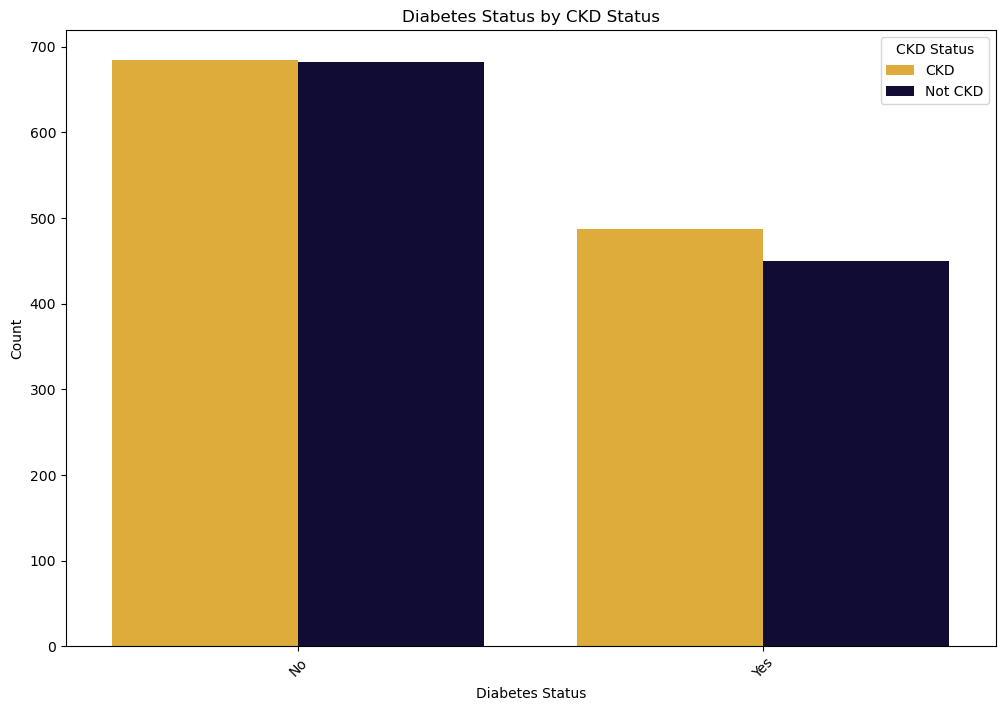

In [115]:
#diabetes on ckd status
random.shuffle(custom_palette)
plt.figure(figsize=(12,8))
sns.countplot(data=data_analysis, x='Diabetes', hue='CKD_Status', palette=custom_palette)
plt.title('Diabetes Status by CKD Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='CKD Status')
plt.show()

C:\Users\pales\AppData\Local\Temp\ipykernel_23096\1021597058.py:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data_analysis, x='Hypertension', hue='CKD_Status', palette=custom_palette)


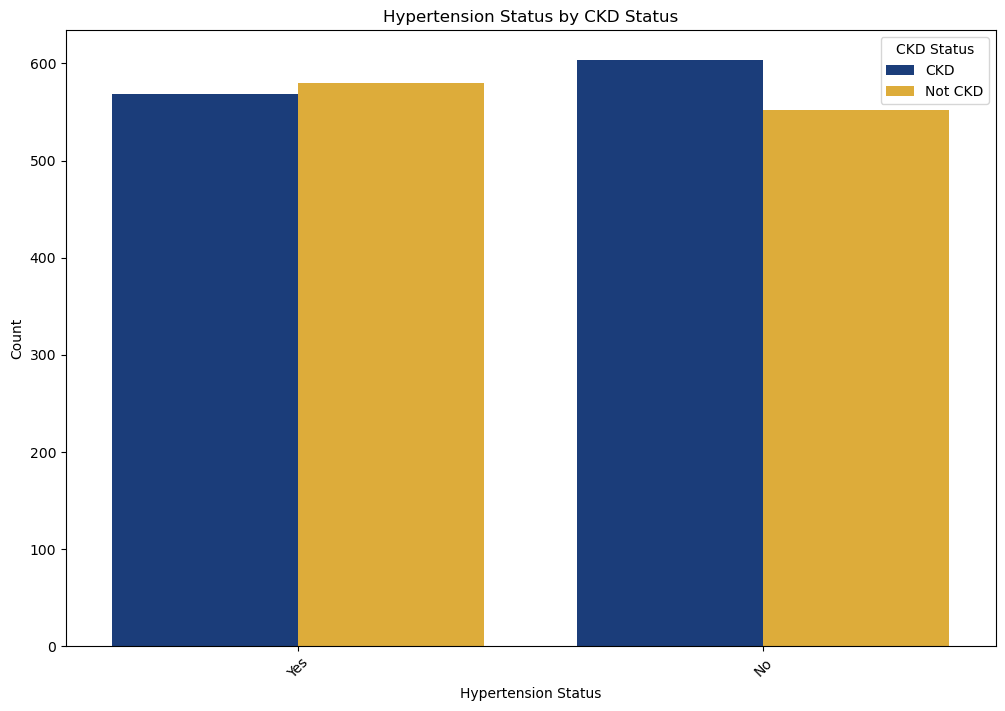

In [118]:
#diabetes on ckd status
random.shuffle(custom_palette)
plt.figure(figsize=(12,8))
sns.countplot(data=data_analysis, x='Hypertension', hue='CKD_Status', palette=custom_palette)
plt.title('Hypertension Status by CKD Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='CKD Status')
plt.show()

C:\Users\pales\AppData\Local\Temp\ipykernel_23096\1748427058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_analysis,x='CKD_Status',y='BUN',palette=custom_palette)
C:\Users\pales\AppData\Local\Temp\ipykernel_23096\1748427058.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(data=data_analysis,x='CKD_Status',y='BUN',palette=custom_palette)


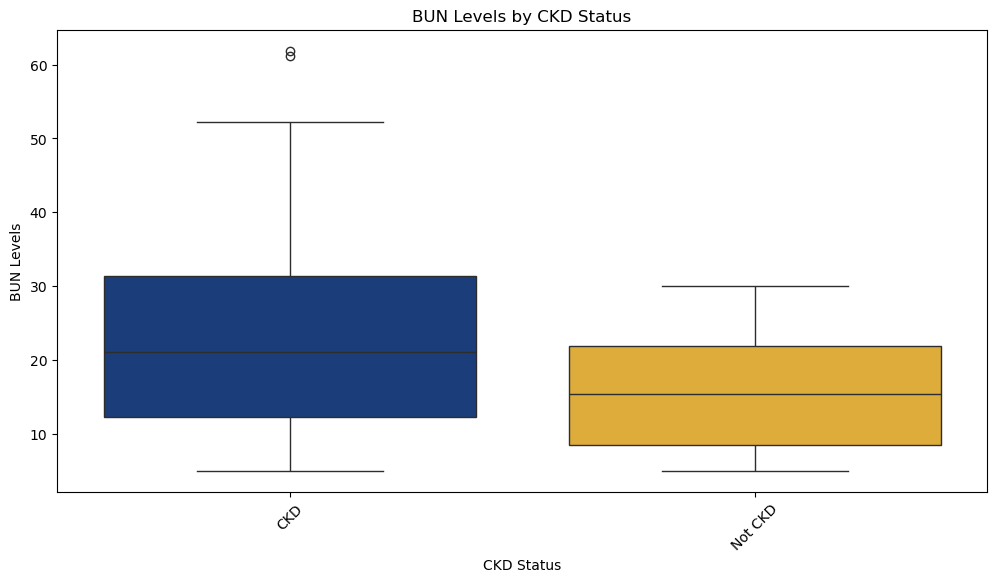

In [119]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_analysis,x='CKD_Status',y='BUN',palette=custom_palette)
plt.title('BUN Levels by CKD Status')
plt.xlabel('CKD Status')
plt.ylabel('BUN Levels')
plt.xticks(rotation=45)
plt.show()

C:\Users\pales\AppData\Local\Temp\ipykernel_23096\58103828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_analysis,x='CKD_Status',y='Urine_Output',palette=custom_palette)
C:\Users\pales\AppData\Local\Temp\ipykernel_23096\58103828.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(data=data_analysis,x='CKD_Status',y='Urine_Output',palette=custom_palette)


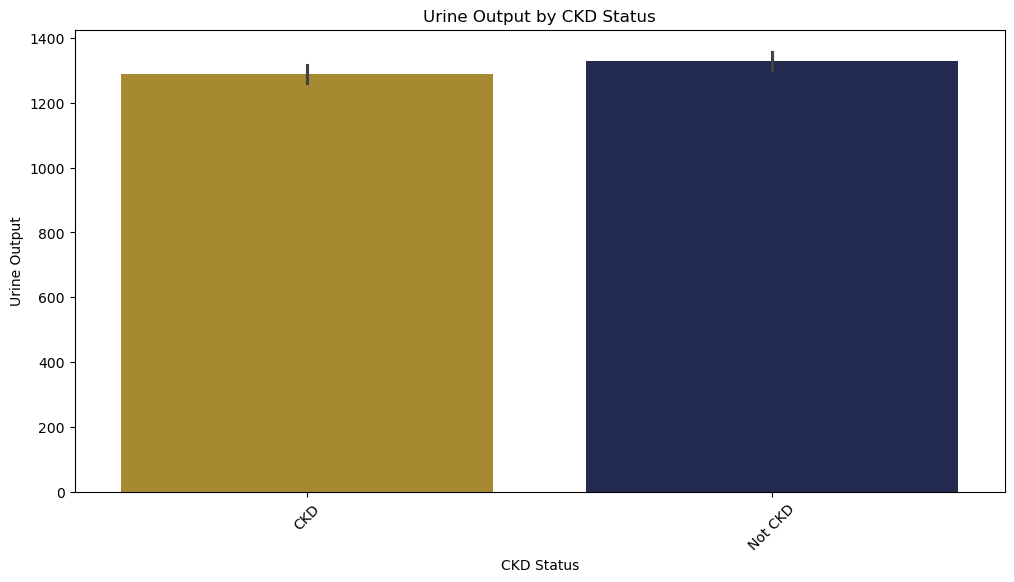

In [121]:
random.shuffle(custom_palette)
plt.figure(figsize=(12, 6))
sns.barplot(data=data_analysis,x='CKD_Status',y='Urine_Output',palette=custom_palette)
plt.title('Urine Output by CKD Status')
plt.xlabel('CKD Status')
plt.ylabel('Urine Output')
plt.xticks(rotation=45)
plt.show()

C:\Users\pales\AppData\Local\Temp\ipykernel_23096\152015387.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data_analysis, x='Diabetes', hue='Dialysis_Needed', palette=custom_palette)


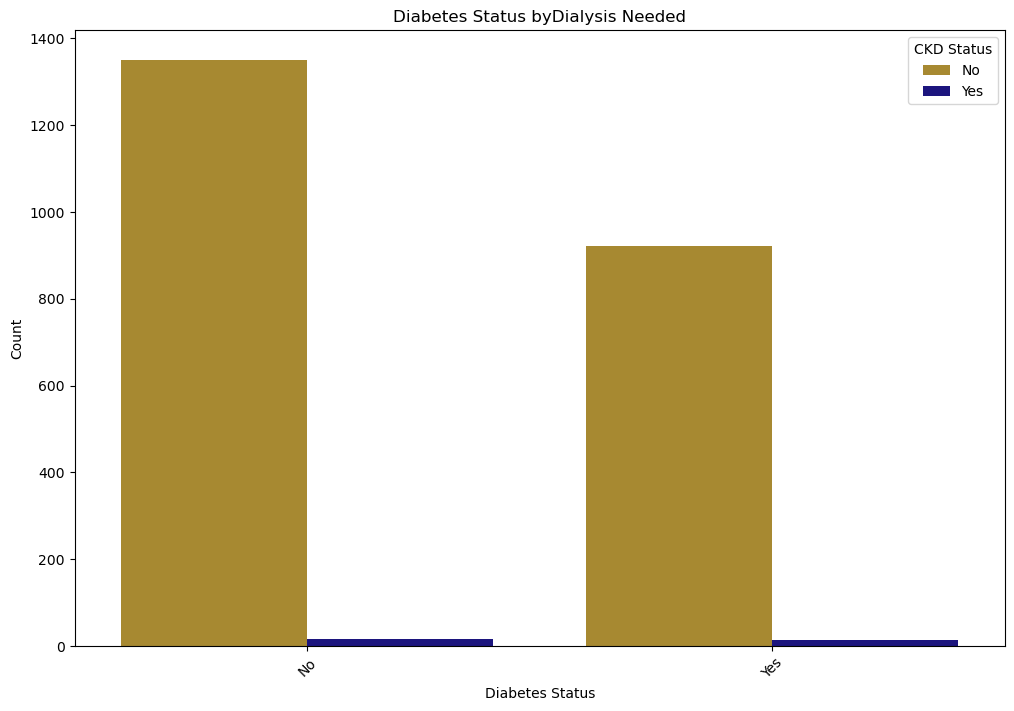

In [123]:
random.shuffle(custom_palette)
plt.figure(figsize=(12,8))
sns.countplot(data=data_analysis, x='Diabetes', hue='Dialysis_Needed', palette=custom_palette)
plt.title('Diabetes Status byDialysis Needed')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='CKD Status')
plt.show()

C:\Users\pales\AppData\Local\Temp\ipykernel_23096\263504286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_analysis,x='Dialysis_Needed',y='BUN',palette=custom_palette)
C:\Users\pales\AppData\Local\Temp\ipykernel_23096\263504286.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(data=data_analysis,x='Dialysis_Needed',y='BUN',palette=custom_palette)


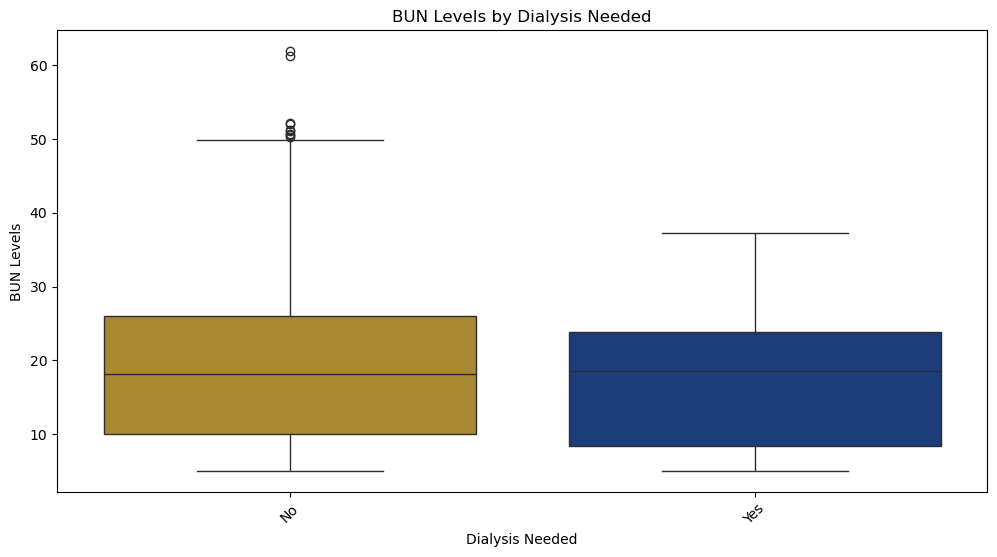

In [127]:
random.shuffle(custom_palette)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_analysis,x='Dialysis_Needed',y='BUN',palette=custom_palette)
plt.title('BUN Levels by Dialysis Needed')
plt.xlabel('Dialysis Needed')
plt.ylabel('BUN Levels')
plt.xticks(rotation=45)
plt.show()

C:\Users\pales\AppData\Local\Temp\ipykernel_23096\3743189376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_analysis,x='Dialysis_Needed',y='Urine_Output',palette=custom_palette)
C:\Users\pales\AppData\Local\Temp\ipykernel_23096\3743189376.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(data=data_analysis,x='Dialysis_Needed',y='Urine_Output',palette=custom_palette)


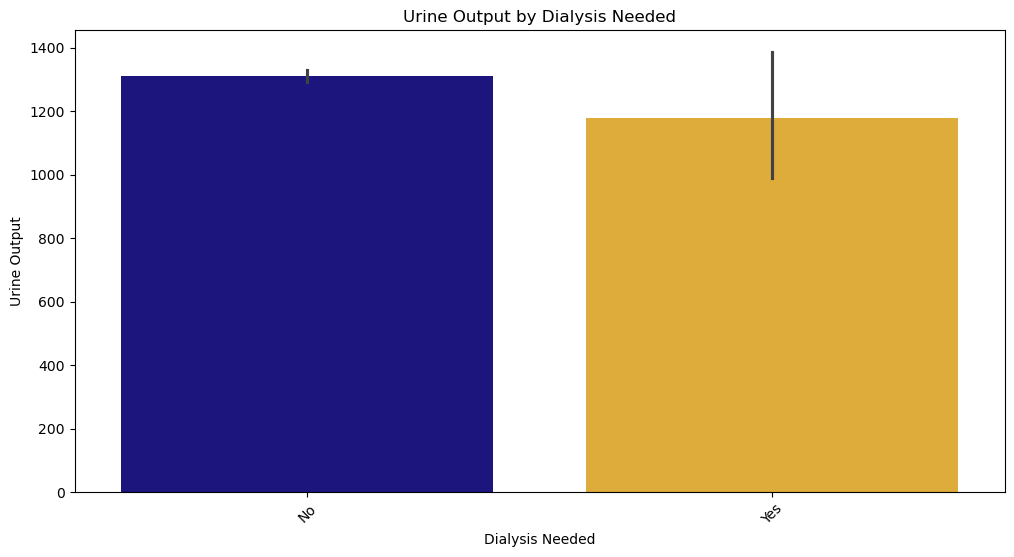

In [135]:
random.shuffle(custom_palette)
plt.figure(figsize=(12, 6))
sns.barplot(data=data_analysis,x='Dialysis_Needed',y='Urine_Output',palette=custom_palette)
plt.title('Urine Output by Dialysis Needed')
plt.xlabel('Dialysis Needed')
plt.ylabel('Urine Output')
plt.xticks(rotation=45)
plt.show()

**Feature Engineering**

#### **Model Building**

**Importing the model libraries**